# Finite differences for the heat equation

## Finite-difference formulation

The 1D heat equation for diffusion (conduction) only and a constant thermal conductivity $k$ is

$$
\begin{equation}
  \rho C_p \frac{\partial T}{\partial t} = k \frac{\partial^2 T}{\partial x^2},
\end{equation}
$$

where $\rho$ is the material density, $C_p$ is the heat capacity, $T$ is temperature, $t$ is time, $x$ is the spatial coordinate (e.g., depth).

The second-order spatial derivative of temperature can be approximated with finite differences as

$$
\begin{align}
  \frac{\partial^2 T}{\partial x^2}\Big\vert_{x=x_1}^{t=t_1} 
&\approx \left(\frac{\partial T}{\partial x}\Big\vert_{x=x_1+0.5\Delta x}^{t=t_1} - \frac{\partial T}{\partial x}\Big   \vert_{x=x_1-0.5\Delta x}^{t=t_1}\right) / \Delta x \newline
&\approx \left(\frac{T_{x=x_1+\Delta x}^{t=t_1} - T_{x=x_1}^{t=t_1}}{\Delta x} - \frac{T_{x=x_1}^{t=t_1} -   T_{x=x_1-\Delta x}^{t=t_1}}{\Delta x}\right) / \Delta x
  = \frac{T_{x=x_1+\Delta x}^{t=t_1} - 2T_{x=x_1}^{t=t_1} + T_{x=x_1 - \Delta x}^{t=t_1}}{(\Delta x)^2}
\end{align}
$$

Since $x_1 - \Delta x = x_0$ and $x_1 + \Delta x = x_2$, we get

$$
\begin{equation}
  \frac{\partial^2 T}{\partial x^2}\Big\vert_{x=x_1}^{t=t_1} \approx \frac{T_{x=x_2}^{t=t_1} - 2T_{x=x_1}^{t=t_1} + T_{x=x_0}^{t=t_1}}{(\Delta x)^2} = \frac{T_{2}^{1} - 2T_{1}^{1} + T_{0}^{1}}{(\Delta x)^2}
\end{equation}
$$

where the last formula uses the short hand notation for indices. Note that here the superscripts do not mean "to the power" but are indices for time steps.

Using the same short hand notation, we can approximate the time derivative of the temperature as

$$
\begin{equation}
  \frac{\partial T}{\partial t}\Big\vert_{x=x_1}^{t=t_1} \approx \frac{T_1^2-T_1^1}{\Delta t}
\end{equation}
$$

These approximations can be generalized as

$$
\begin{align}
  \frac{\partial^2 T}{\partial x^2}\Big\vert_{x=x_i}^{t=t_q} &\approx \frac{T_{i+1}^{q} - 2T_{i}^{q} + T_{i-1}^{q}}{(\Delta x)^2} \newline
  \frac{\partial T}{\partial t}\Big\vert_{x=x_i}^{t=t_q} &\approx \frac{T_i^{q+1}-T_i^q}{\Delta t}
\end{align}
$$

And thus the full finite differences approximation of the heat equation can be written as

$$
\begin{equation}
  \rho C_p \frac{T_i^{q+1}-T_i^q}{\Delta t} = k \frac{T_{i+1}^{q} - 2T_{i}^{q} + T_{i-1}^{q}}{(\Delta x)^2}
\end{equation}
$$

This applies to *any* $q$ and $i$. If we know $T$ everywhere at time $t_q$, we can calculate $T$ at time $t_{q+1} = t_q + \Delta t$.

### Exercise - The implicit form?

- How would the implicit (backward difference in time) approximation look like for the heat equation?
    - Recall that in the implicit approximation we used the values from the next time step to approximate the derivative.
    - What is the problem in calculating $T_i^q$ using the implicit approximation?
### Answer
You end up incrementing the q in each of the equations above by +1, but you cannot do it for the first value and need to know what $T^{0}$ is

## Boundary and initial conditions

To start calculating the values of $T$, we need the *initial* values at some time $t_0$. This temperature field is the so called *initial condition* for our problem. It is a type of boundary condition that applies to a time varying field.

(Spatial) boundary conditions are needed because when applying finite differences to a differential equation (in space), we need the surrounding values, such as $T_{i+1}$ and $T_{i-1}$ in the case of heat equation, to calculate the next value of $T_{i}$. These values are not available if we are near the geometrical boundary of the problem.

## Cooling of an intrusion

Next we will use finite differences to model the cooling of a (very large) magma intrusion within the crust. The crust is limited by the upper surface and the crust-mantle boundary at the bottom. It is 35 km thick and intruded by a horizontal, granitic magma intrusion (sill) that extends from 5 km to 10 km depth. Our task is to calculate the temperature distribution in the crust after 100 kyrs.

Our strategy for solving the problem in Python is the following:

0. Draw a picture!
1. Decide on model geometry and physical parameters
    - One-dimensional
    - Homogeneous physical parameters
    - $\Rightarrow$ we can use the equation above
2. Set physical parameters ($\rho$, $C_p$, $k$)
3. Set geometrical parameters ($L$, $\Delta x$ $\Rightarrow$ `nx`)
4. Set total run time and time step size ($t_{total}$, $\Delta t$ $\Rightarrow$ `nt`)
5. Decide and set boundary condition values $T_0$ and $T_{nx-1}$
6. Create two arrays that hold the temperature, size `nx` elements
    - `Tnew` for $T^{q+1}$
    - `Tprev` for $T^{q}$
7. Create an array for grid point locations ($x$ coordinates), size `nx`
8. Set `Tprev` to hold the initial temperature field
    - Linear geotherm throughout the crust, constant temperature within the sill
9. Start the loop that iterates over all the time steps. Within the time step:
    - Set the temperature at the boundaries, according to boundary conditions, at `Tnew[0]` and `Tnew[nx-1]`
    - Calculate remaining (internal grid points) within `Tnew` based on values of `Tprev`
    - Prepare for next time step: Copy all values of `Tnew` to `Tprev`


### Exercise - Coding your solution, considering your results

- Use the outline above to start implementing the code. Once the code seems to work, experiment with it:
    - How does changing values of `Cp` and `rho` affect the results?
    - Give `dt` values that are close to the critical time step. How do the results change?
    - Can the code handle intrusions that are only 500 m in width?
- What have we silently assumed in the implementation of the code? For example, can we model the problem in simplified 1D world? What kind of physical processes that are likely to be present may we have omitted?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dx is 3.5 m.
Calculating 100000 time steps.


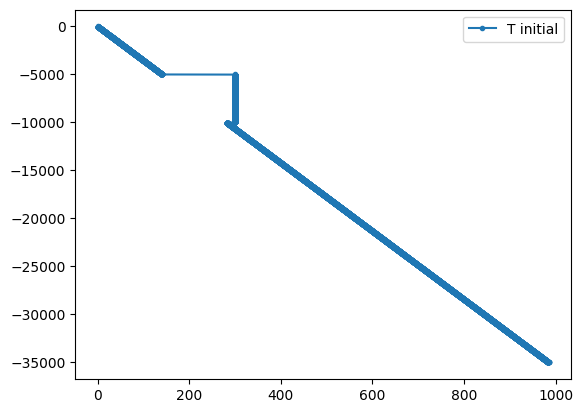

(10001,)


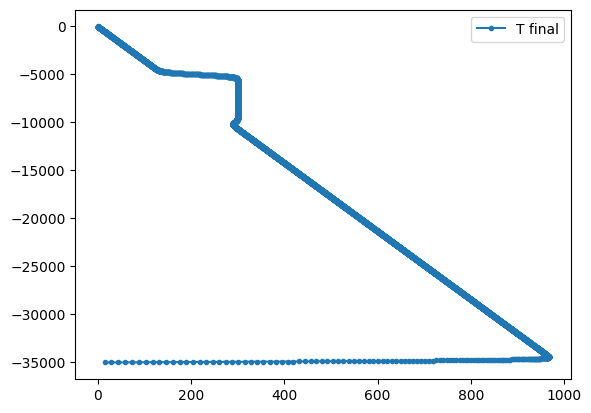

In [28]:
# Frame for FD solution for heat diffusion
# Fill in lines marked with "(...)"

import numpy as np
import matplotlib.pyplot as plt

# Set material properties
rho = 2670 # rock density, kg m^-3
Cp = 790   # rock heat capacity, J kg^-1 K^-1
k = 3.62   # rock heat conductivity, W m^-1 K^-1

# Set geometry and dimensions
L = 35000       # thickness of the crust, m
nx = 10001       # number of grid points, -
dx = L / (nx-1)  
print(f"dx is {dx} m.")

silltop = 5000   # depth of the top of the sill, m
sillbott = 10000  # depth of the bottom of the sill, m

# Set total time and time step
t_total = 10000000000         # total run time, s
dt = 100000       # time step, s
nt = int(np.floor(t_total / dt))
print(f"Calculating {nt} time steps.")

# Set boundary temperature values and intrusion temperature
Tsurf = 15      # surface temperature, deg C, avg soil temp
Tmoho = 1000      # Moho temperature, deg C
Tintrusion = 300 # Intrusion temperature, deg C

# TODO: Create arrays to hold temperature fields.
# These need to have `nx` elements and can be 
# set to zero for now.
Tnew = np.zeros((nx,))
Tprev = np.zeros((nx,))
Tprev_add_one = np.zeros((nx,))
Tprev_sub_one = np.zeros((nx,))

# TODO: Create coordinates of the grid points.
# We want `x` to have evenly spaced values 
# from zero to `L`, with `nx` elements.
# Use `np.linspace()`.
x = np.linspace(0, L, nx)

# Generate initial temperature field.
# 
for i, ix in enumerate(x):
    # TODO: Add condition that tests whether 
    # element `ix` of `x` is inside the sill.
    if silltop < ix < sillbott:
        Tprev[i] = Tintrusion
    else:
        # x[ix] is outside the sill.
        # This assumes linear geotherm between
        # surface temperature and moho temperature
        Tprev[i] = x[i] * (Tmoho - Tsurf) / L
Tprev_add_one[:nx-1] = Tprev[1:]
Tprev_sub_one[1:] = Tprev[:nx-1]

# Plot initial temperature field
plt.plot(Tprev, -x, ".-", label="T initial")
plt.legend()
plt.show()

# Start the loop over time steps
curtime = 0

    
# TODO: Set boundary conditions.
# Set elements zero and `nx-1` of the new temperature field
# to surface temperature and Moho temperature, respectively
Tnew[0] = Tsurf
Tnew[nx - 1] = Tmoho
for i in range(nt):
    # Calculate next values of the internal grid points
    
    # for ix in range(1, nx - 1):
    #     # TODO: Calculate the new temperature at Tnew[ix] based
    #     # on values in `Tprev`, `k`, `dt`, `rho` and `Cp`.
    #     # Use FD approximation from above and rearrange it
    #     # to get an expression for T_i^{q+1}. Be extra careful
    #     # with correct placement of parentheses!
    Tnew = (k * dt) / (rho * Cp * dx**2) * (Tprev_add_one - 2 * Tprev + Tprev_sub_one) + Tprev

        
    # Copy values from Tnew to Tprev
    Tprev[:] = Tnew[:]
    Tprev_add_one[:nx-1] = Tprev[1:]
    Tprev_add_one[nx-1] = 0
    Tprev_sub_one[1:] = Tprev[:nx-1]
    Tprev_sub_one[0] = 0
    
    
print(Tnew.shape)
# Plot the final temperature field
plt.plot(Tnew, -x, ".-", label="T final")
plt.legend()
plt.show()